<a href="https://colab.research.google.com/github/ashbyp/mltorch/blob/master/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro

In [266]:
import torch
import sys
from torch import nn
import matplotlib.pyplot as plt

print(f'Python:{sys.version}')
print(f'Torch: {torch.__version__}')


Python:3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Torch: 1.12.0+cu113


## Data Loading

In [267]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
print(X[:10,:])
print(f'X Shape: {X.shape}, Dims: {X.ndim} Len: {len(X)}')
print(y[:10,:])
print(f'y Shape: {y.shape}, Dims: {y.ndim} Len: {len(y)}')

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
X Shape: torch.Size([50, 1]), Dims: 2 Len: 50
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
y Shape: torch.Size([50, 1]), Dims: 2 Len: 50


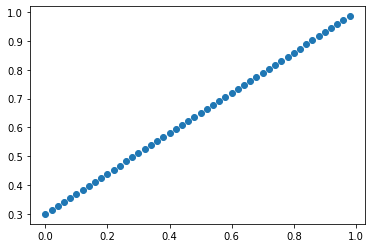

In [268]:
plt.scatter(X, y)
plt.show()

## Splitting Data

In [269]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print('X: ', len(X_train), len(X_test))
print('y: ', len(y_train), len(y_test))


X:  40 10
y:  40 10


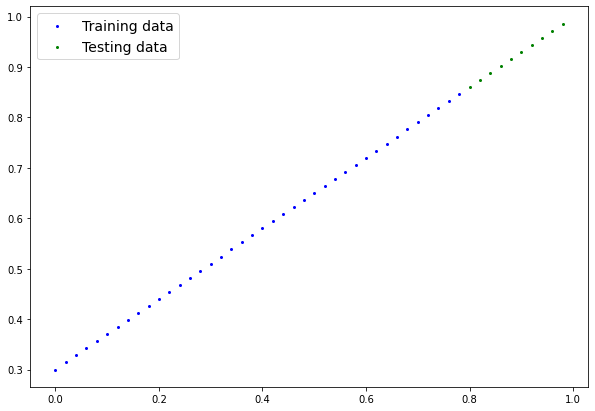

In [270]:
from numpy.ma.core import nonzero

def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, 
                     test_labels=y_test, predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')
  if predictions is not None:
     plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={'size': 14})
  plt.show()


plot_predictions()



## Building a model

In [271]:
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


In [272]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
print(list(model_0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [273]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

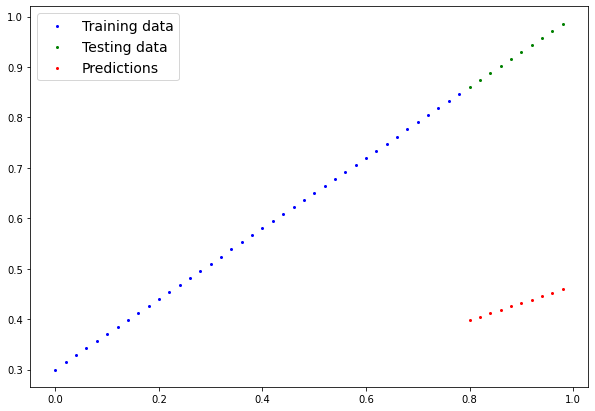

In [274]:
with torch.inference_mode(): 
    y_preds = model_0(X_test)

y_preds

plot_predictions(predictions=y_preds)


## Loss function and Optimizer

In [275]:
# Measures the model error in prediction, in this case the mean of the abs difference between predicted and actual
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [276]:
# Adjusts paramters to minumize the loss function
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

##Training/testing Loop

In [277]:
# epoch is one loop through the data
epochs = 200

# Tracking
epoch_counts = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  #training

  model_0.train()
  # forward pass
  y_pred = model_0(X_train)
  # calculate loss
  loss = loss_fn(y_pred, y_train)
  # optimzier zero grad
  optimizer.zero_grad()
  # backward propagation
  loss.backward()
  # step the optimizer (grad descent)
  optimizer.step()

  #testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} Loss: {loss} Test loss: {test_loss}')

    epoch_counts.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)


Epoch: 0 Loss: 0.31288138031959534 Test loss: 0.48106518387794495
Epoch: 10 Loss: 0.1976713240146637 Test loss: 0.3463551998138428
Epoch: 20 Loss: 0.08908725529909134 Test loss: 0.21729660034179688
Epoch: 30 Loss: 0.053148526698350906 Test loss: 0.14464017748832703
Epoch: 40 Loss: 0.04543796554207802 Test loss: 0.11360953003168106
Epoch: 50 Loss: 0.04167863354086876 Test loss: 0.09919948130846024
Epoch: 60 Loss: 0.03818932920694351 Test loss: 0.08886633068323135
Epoch: 70 Loss: 0.03476089984178543 Test loss: 0.0805937647819519
Epoch: 80 Loss: 0.03132382780313492 Test loss: 0.07232122868299484
Epoch: 90 Loss: 0.02788739837706089 Test loss: 0.06473556160926819
Epoch: 100 Loss: 0.024458957836031914 Test loss: 0.05646304413676262
Epoch: 110 Loss: 0.021020207554101944 Test loss: 0.04819049686193466
Epoch: 120 Loss: 0.01758546568453312 Test loss: 0.04060482233762741
Epoch: 130 Loss: 0.014155393466353416 Test loss: 0.03233227878808975
Epoch: 140 Loss: 0.010716589167714119 Test loss: 0.0240597

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


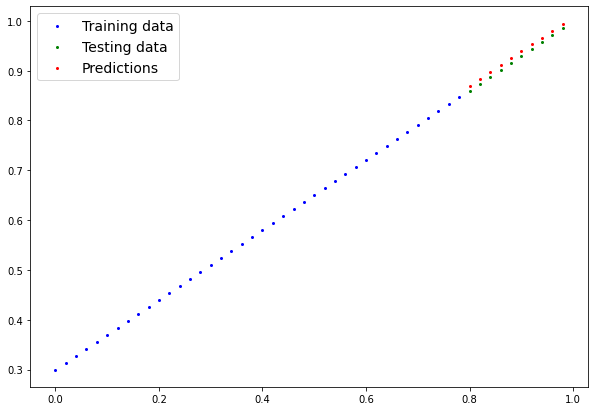

In [278]:
print(model_0.state_dict())

with torch.inference_mode():
  y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)





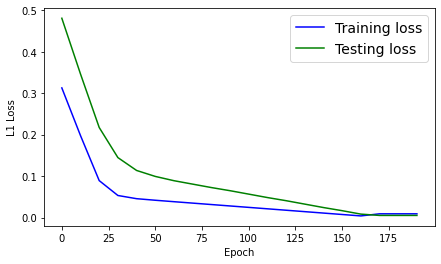

In [279]:
with torch.inference_mode():
  plt.figure(figsize=(7, 4))
  plt.plot(epoch_counts, loss_values, c='b', label='Training loss')
  plt.plot(epoch_counts, test_loss_values, c='g', label='Testing loss')
  plt.legend(prop={'size': 14})
  plt.xlabel('Epoch')
  plt.ylabel('L1 Loss')

  plt.show()

##Saving a model

In [280]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [281]:
from pathlib import Path

model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)
model_name = '01_pytorchworkflow.pth'
save_path = model_path / model_name
torch.save(model_0.state_dict(), save_path)


##Loading a model

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


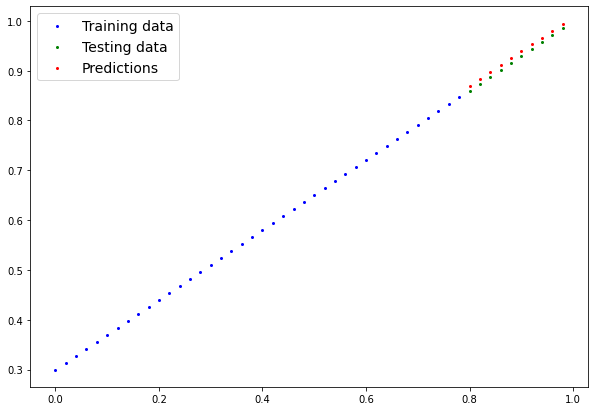

In [282]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(save_path))
print(loaded_model_0.state_dict())
with torch.inference_mode():
  y_pred_loaded = loaded_model_0(X_test)
plot_predictions(predictions=y_pred_loaded)

##Using Linear Layer

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])
Epoch: 0 Loss: 0.5551779866218567 Test loss: 0.5739762187004089
Epoch: 10 Loss: 0.4399680495262146 Test loss: 0.4392663538455963
Epoch: 20 Loss: 0.3247582018375397 Test loss: 0.30455657839775085
Epoch: 30 Loss: 0.20954827964305878 Test loss: 0.16984674334526062
Epoch: 40 Loss: 0.09433844685554504 Test loss: 0.03513689711689949
Epoch: 50 Loss: 0.023886386305093765 Test loss: 0.04784906655550003
Epoch: 60 Loss: 0.0199567973613739 Test loss: 0.04580312222242355
Epoch: 70 Loss: 0.016517987474799156 Test loss: 0.0375305712223053
Epoch: 80 Loss: 0.013089170679450035 Test loss: 0.029944902285933495
Epoch: 90 Loss: 0.009653178043663502 Test loss: 0.02167237363755703
Epoch: 100 Loss: 0.006215679459273815 Test loss: 0.014086711220443249
Epoch: 110 Loss: 0.002787243574857712 Test loss: 0.005814164876937866
Epoch: 120 Loss: 0.0012645035749301314 Test loss: 0.013801807537674904
Epoch: 130 Loss: 0.001

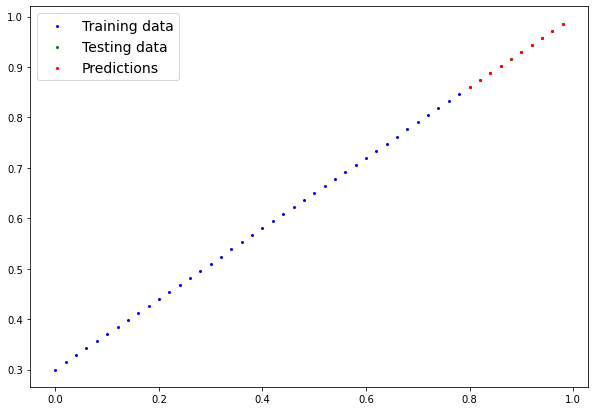

In [286]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
  
  def forward(self, x):
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
print(model_1.state_dict())

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

# epoch is one loop through the data
epochs = 200

# Tracking
epoch_counts = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  #training

  model_1.train()
  # forward pass
  y_pred = model_1(X_train)
  # calculate loss
  loss = loss_fn(y_pred, y_train)
  # optimzier zero grad
  optimizer.zero_grad()
  # backward propagation
  loss.backward()
  # step the optimizer (grad descent)
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} Loss: {loss} Test loss: {test_loss}')

    epoch_counts.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

print(model_1.state_dict())

with torch.inference_mode():
  preds = model_1(X_test)

plot_predictions(predictions=preds)

model_name = '01_pytorchworkflow_1.pth'
save_path = model_path / model_name
torch.save(model_0.state_dict(), save_path)
